In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Walmart DataSet.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.shape

(6435, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Dataset Information: 
The walmart.csv contains 6435 rows and 8 columns.
- STORE : store number
- DATE : week of sales
- WEEKLY_SALES : sales for the given store in that week
- HOLIDAY_FLAG : if it is a holiday week
- TEMPERATURE : temperature on the day of the sale
- FUEL_PRICE : cost of the fuel in the region
- CPI : consumer price index
- UNEMPLOYMENT : unemployent rate

In [5]:
df['Store'].value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

In [6]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
df.set_index('Date',inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


<Axes: >

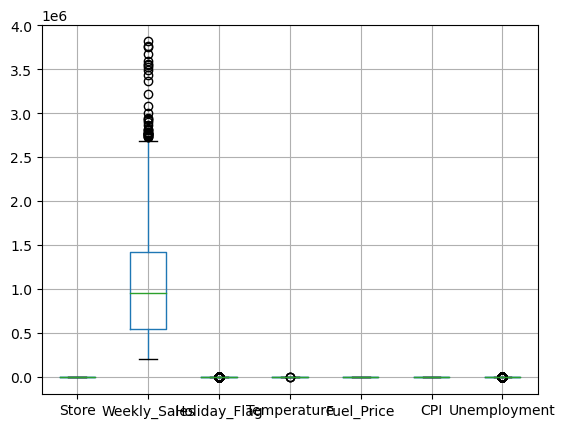

In [8]:
df.boxplot()

In [10]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]['Weekly_Sales']

# Remove outliers from the dataframe
df = df[(df['Weekly_Sales'] >= lower_bound) & (df['Weekly_Sales'] <= upper_bound)]


In [11]:
df.shape

(6401, 7)

<Axes: xlabel='Date'>

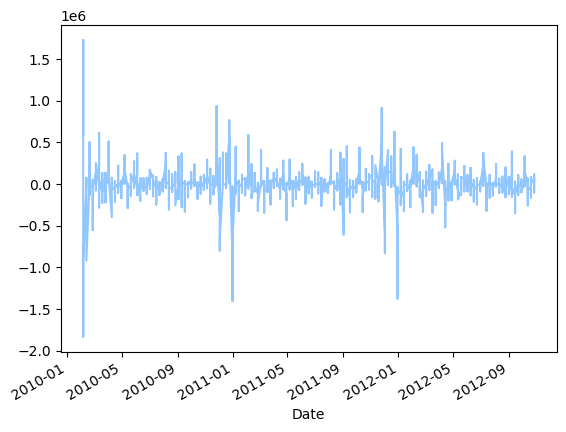

In [47]:
df['Weekly_Sales'].diff().plot()

### 1(a). If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [12]:
corr_per_store = df.groupby('Store')[['Weekly_Sales','Unemployment']].corr().iloc[0::2,-1]
corr_per_store

Store              
1      Weekly_Sales   -0.097955
2      Weekly_Sales    0.054288
3      Weekly_Sales   -0.230413
4      Weekly_Sales   -0.639563
5      Weekly_Sales   -0.207043
6      Weekly_Sales    0.016833
7      Weekly_Sales   -0.165382
8      Weekly_Sales   -0.052580
9      Weekly_Sales   -0.191534
10     Weekly_Sales    0.186979
11     Weekly_Sales   -0.020339
12     Weekly_Sales   -0.009286
13     Weekly_Sales   -0.400254
14     Weekly_Sales    0.269510
15     Weekly_Sales    0.078905
16     Weekly_Sales   -0.070864
17     Weekly_Sales   -0.263600
18     Weekly_Sales    0.139179
19     Weekly_Sales    0.101464
20     Weekly_Sales   -0.109391
21     Weekly_Sales    0.218367
22     Weekly_Sales    0.039043
23     Weekly_Sales   -0.125490
24     Weekly_Sales   -0.012261
25     Weekly_Sales   -0.004958
26     Weekly_Sales   -0.066899
27     Weekly_Sales   -0.002535
28     Weekly_Sales    0.136671
29     Weekly_Sales    0.084682
30     Weekly_Sales    0.201862
31     Weekly_Sales 

In [13]:
corr_per_store.groupby('Store').mean().sort_values().head(5)

Store
38   -0.785290
44   -0.780076
4    -0.639563
13   -0.400254
39   -0.384681
Name: Unemployment, dtype: float64

### 1(b). If the weekly sales show a seasonal trend, when and what could be the reason?

<Axes: xlabel='Date'>

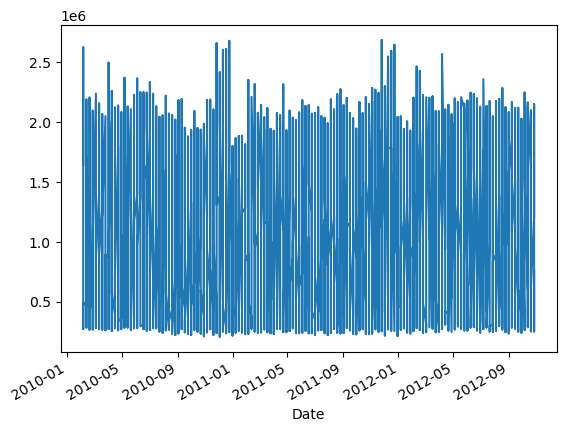

In [14]:
df['Weekly_Sales'].plot()

In [15]:
# there are 45 stores data in the dataset
# lets consider one random store and work on it for future 
sales = df[df['Store']==22]
sales.shape

(143, 7)

In [16]:
sales.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,22,1033017.37,0,24.36,2.788,135.352461,8.283
2010-02-12,22,1022571.25,1,28.14,2.771,135.411308,8.283
2010-02-19,22,988467.61,0,31.96,2.747,135.465778,8.283


<Axes: xlabel='Date'>

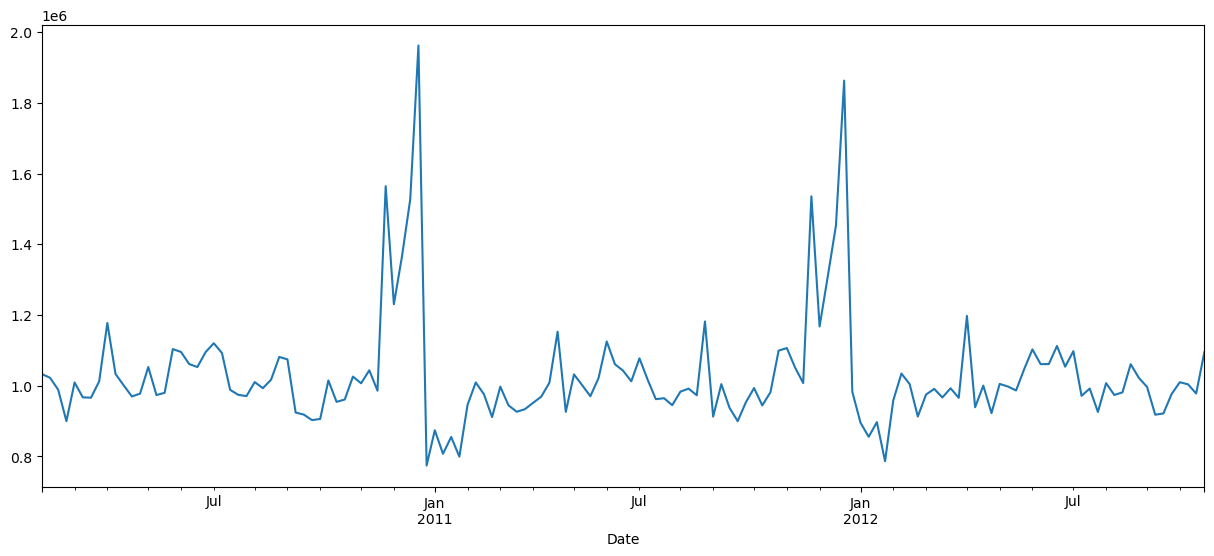

In [17]:
sales['Weekly_Sales'].plot(figsize=(15,6))

<Figure size 640x480 with 0 Axes>

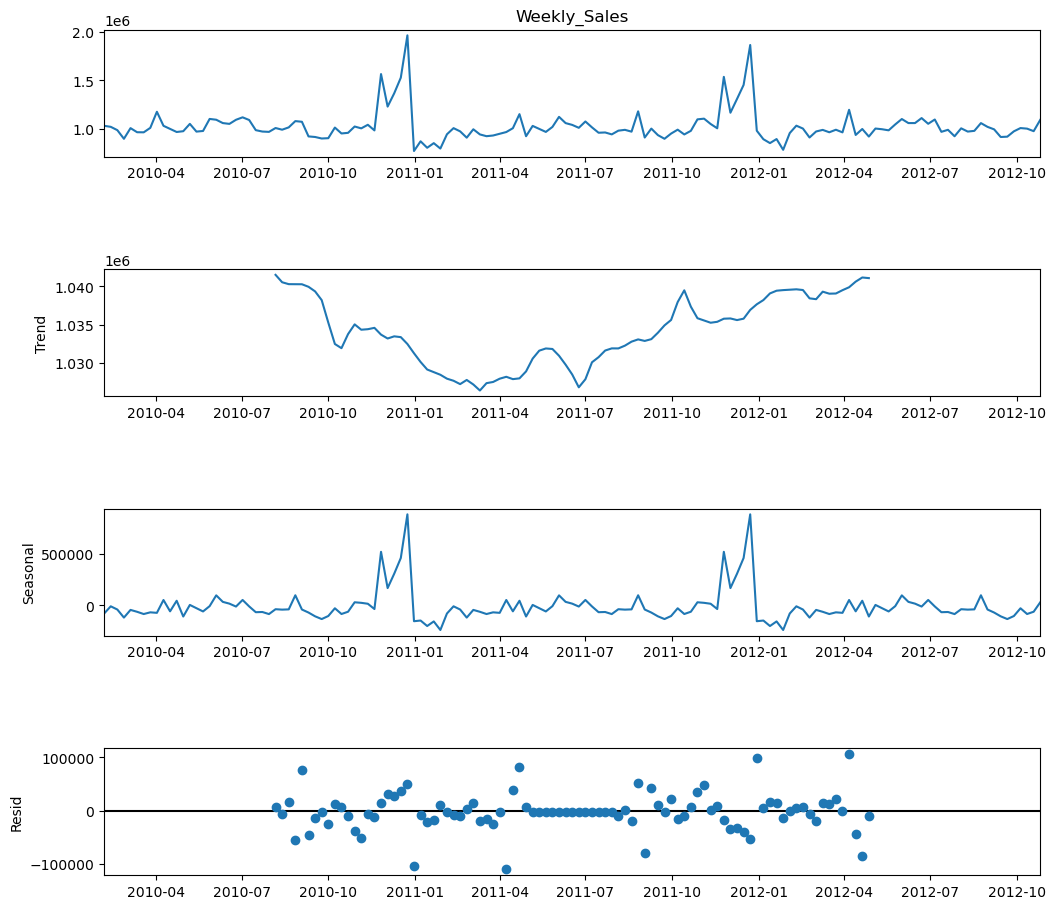

In [18]:
# lets see the seasonal decompose of weekly sales data
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales['Weekly_Sales']) # default model is additive
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12,10)  # set the figure size in inches

### 1(c). Does temperature affect the weekly sales in any manner?

In [19]:
sales.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,22,1033017.37,0,24.36,2.788,135.352461,8.283
2010-02-12,22,1022571.25,1,28.14,2.771,135.411308,8.283
2010-02-19,22,988467.61,0,31.96,2.747,135.465778,8.283
2010-02-26,22,899761.48,0,35.98,2.753,135.519519,8.283
2010-03-05,22,1009201.24,0,36.82,2.766,135.573260,8.283


Text(0, 0.5, 'Weekly_sales')

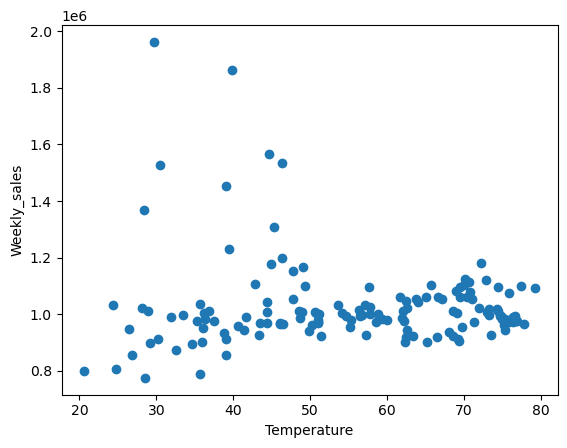

In [20]:
plt.scatter(sales['Temperature'],sales['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly_sales')

### 1(d). How is the Consumer Price index affecting the weekly sales of various stores?

In [21]:
corr_cpi = df.groupby('Store')[['Weekly_Sales','CPI']].corr().iloc[0::2,-1]
corr_cpi

Store              
1      Weekly_Sales    0.225408
2      Weekly_Sales   -0.063786
3      Weekly_Sales    0.317250
4      Weekly_Sales    0.675231
5      Weekly_Sales    0.308261
6      Weekly_Sales    0.033524
7      Weekly_Sales    0.289044
8      Weekly_Sales    0.120255
9      Weekly_Sales    0.294805
10     Weekly_Sales   -0.130205
11     Weekly_Sales    0.069781
12     Weekly_Sales    0.084087
13     Weekly_Sales    0.401445
14     Weekly_Sales   -0.498495
15     Weekly_Sales   -0.174467
16     Weekly_Sales    0.124285
17     Weekly_Sales    0.348571
18     Weekly_Sales   -0.193541
19     Weekly_Sales   -0.155341
20     Weekly_Sales    0.203508
21     Weekly_Sales   -0.163649
22     Weekly_Sales   -0.038602
23     Weekly_Sales    0.137196
24     Weekly_Sales   -0.013684
25     Weekly_Sales   -0.010914
26     Weekly_Sales    0.131980
27     Weekly_Sales   -0.235769
28     Weekly_Sales   -0.095908
29     Weekly_Sales   -0.072530
30     Weekly_Sales   -0.298188
31     Weekly_Sales 

In [22]:
corr_cpi.groupby('Store').mean().sort_values().head()

Store
36   -0.915095
14   -0.498495
35   -0.424107
30   -0.298188
43   -0.285686
Name: CPI, dtype: float64

<Axes: ylabel='Store-None'>

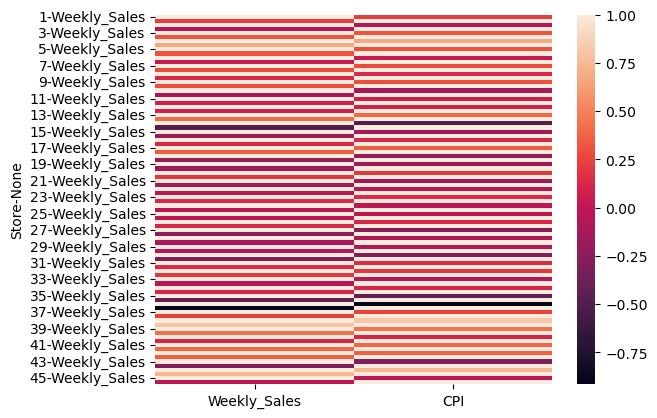

In [23]:
import seaborn as sns

corr_cpi_2 = df.groupby('Store')[['Weekly_Sales','CPI']].corr() 
sns.heatmap(corr_cpi_2)

Text(0, 0.5, 'Consumer Price Index')

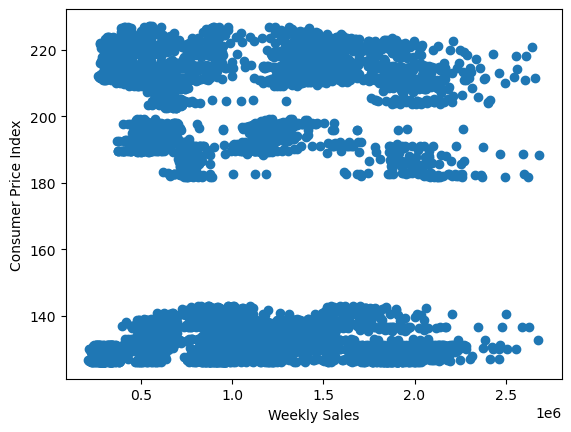

In [24]:
plt.scatter(df['Weekly_Sales'],df['CPI'])
plt.xlabel('Weekly Sales')
plt.ylabel('Consumer Price Index')

### 1(e). Top performing stores according to the historical data.

In [25]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5960
1     441
Name: count, dtype: int64

In [26]:
Total_Sales = df.groupby('Store')['Weekly_Sales'].sum()
Total_Sales.sort_values(ascending=False).head()

Store
4     2.810352e+08
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
Name: Weekly_Sales, dtype: float64

### 1(f). The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [27]:
top_store = Total_Sales.sort_values(ascending=False).head(1)
bottom_store = Total_Sales.sort_values(ascending=True).head(1)

print('Top store is: ',top_store.index)
print('Bottom store is: ',bottom_store.index)

Top store is:  Index([4], dtype='int64', name='Store')
Bottom store is:  Index([33], dtype='int64', name='Store')


In [28]:
diff = top_store.iloc[0] - bottom_store.iloc[0]
print('Difference in sales between highest and lowest performing stores is: ',diff)

Difference in sales between highest and lowest performing stores is:  243875002.96


## 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [29]:
# define p,d,q parameters to take any value between 0 to 5
p = d = q = range(0,5)

# generate all diff combinations of p,d,q
import itertools
pdq = list(itertools.product(p,d,q))

# generate a;; diff combinations of p,d,q seasonal triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]  # 52 weeks in a year

In [30]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(sales['Weekly_Sales'],  # lets predict for store 22 for now
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)  # dont transform MA parameters

results = mod.fit()

print(results.summary().tables[1])

D:\Users\Madhu\Downloads\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
D:\Users\Madhu\Downloads\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
D:\Users\Madhu\Downloads\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8666      0.733     -2.547      0.011      -3.303      -0.430
ar.L2         -1.5796      0.951     -1.662      0.097      -3.443       0.284
ar.L3         -0.8198      0.785     -1.044      0.296      -2.359       0.719
ar.L4         -0.1728      0.374     -0.462      0.644      -0.905       0.560
ma.L1         -1.2072      0.744     -1.623      0.105      -2.665       0.251
ma.L2         -0.5138      1.350     -0.381      0.703      -3.159       2.131
ma.L3          0.7290      0.656      1.112      0.266      -0.556       2.014
ar.S.L52      -0.2108      0.089     -2.366      0.018      -0.385      -0.036
sigma2      1.696e+10   1.27e-10   1.34e+20      0.000     1.7e+10     1.7e+10


C:\Users\Madhu\AppData\Local\Temp\ipykernel_7928\3118473246.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


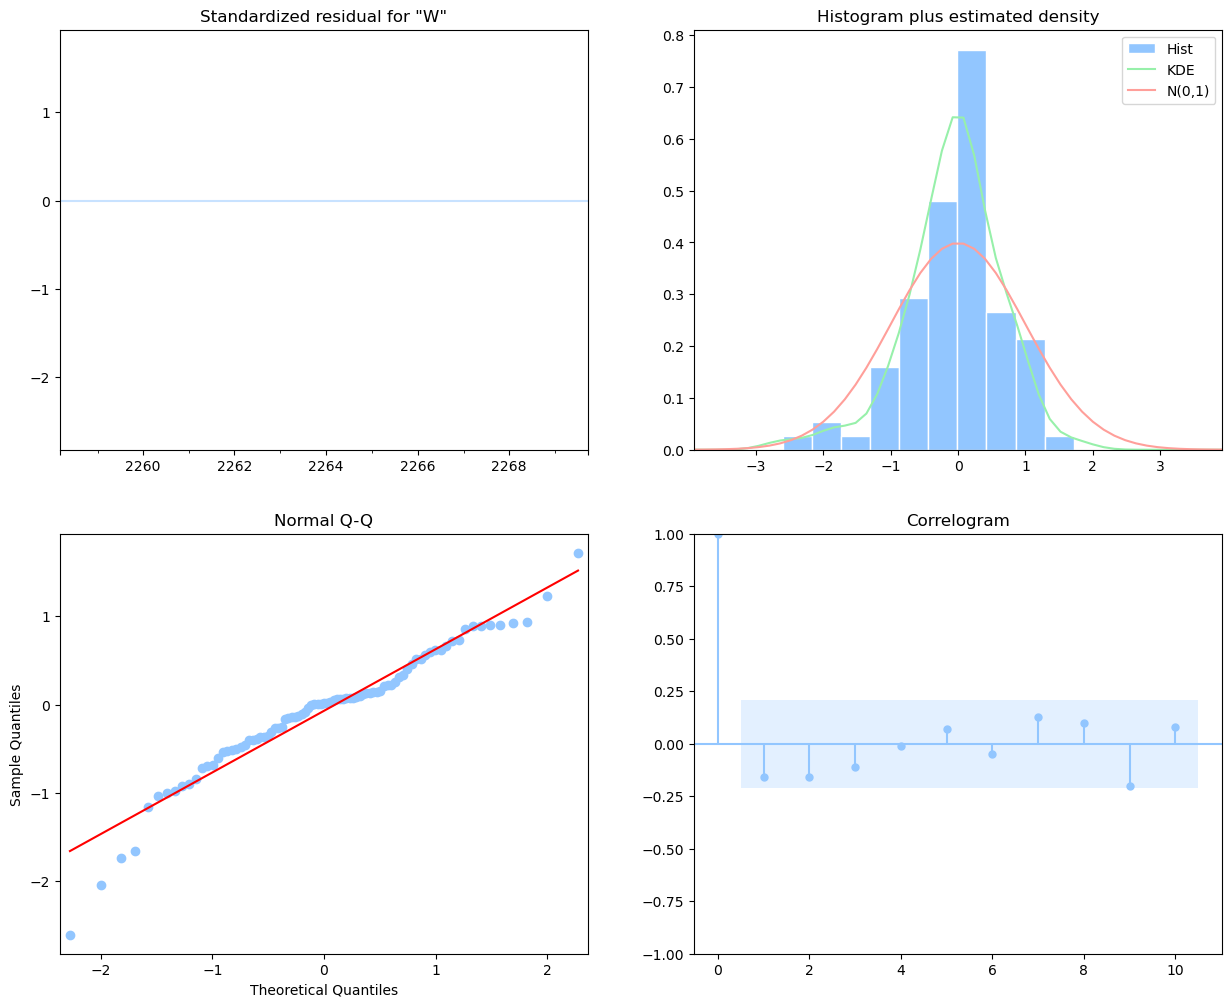

In [31]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))  # Diagnostic plots for standardized residuals of one endogenous variable
plt.show()

In [32]:
sales.tail(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-10-26,22,1094422.69,0,57.58,3.917,142.762411,7.543


In [33]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()  # confidence interval for predicted mean

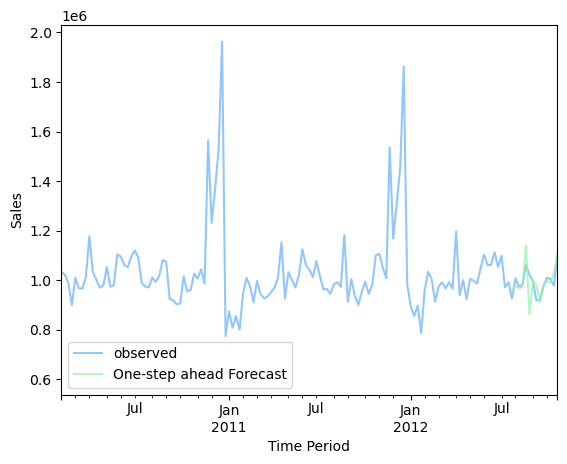

In [34]:
ax = sales.Weekly_Sales['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,   # fill the area between two horizontal curves
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [35]:
# lets evaluate our model

y_forecasted = pred.predicted_mean
y_truth = sales.Weekly_Sales['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2940764042.68


In [36]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 54228.81


In [37]:
Residual= y_forecasted - y_truth
print("Residual for Store 22: ",np.abs(Residual).sum())

Residual for Store 22:  480498.2909535889


#### Dynamic forecasting

In [38]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True) # dynamic prediction
pred_dynamic_ci = pred_dynamic.conf_int()

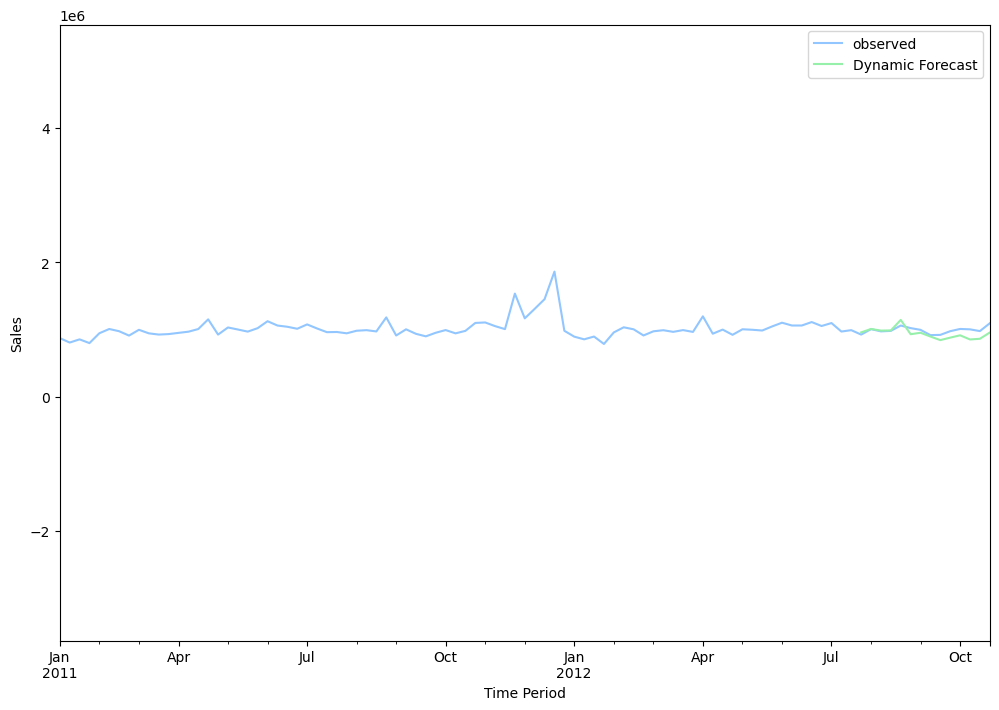

In [39]:
ax = sales.Weekly_Sales['2011':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), sales.Weekly_Sales.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()


In [40]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

2012-07-27    9.588993e+05
2012-08-03    1.009522e+06
2012-08-10    9.855517e+05
2012-08-17    9.878070e+05
2012-08-24    1.144472e+06
2012-08-31    9.317287e+05
2012-09-07    9.533825e+05
2012-09-14    8.970539e+05
2012-09-21    8.438044e+05
2012-09-28    8.805353e+05
2012-10-05    9.152638e+05
2012-10-12    8.534294e+05
2012-10-19    8.635309e+05
2012-10-26    9.567711e+05
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [41]:
y_actual = sales.Weekly_Sales['2012-7-27':]

print(y_actual)

Date
2012-07-27     925731.21
2012-08-03    1007257.83
2012-08-10     973812.79
2012-08-17     981273.26
2012-08-24    1060906.75
2012-08-31    1022270.86
2012-09-07     996628.80
2012-09-14     918049.28
2012-09-21     921612.53
2012-09-28     976479.51
2012-10-05    1009887.36
2012-10-12    1004039.84
2012-10-19     978027.95
2012-10-26    1094422.69
Name: Weekly_Sales, dtype: float64


#### Forecast for next 12 weeks

In [42]:
# Get forecast 12 weeks ahead in future

pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()

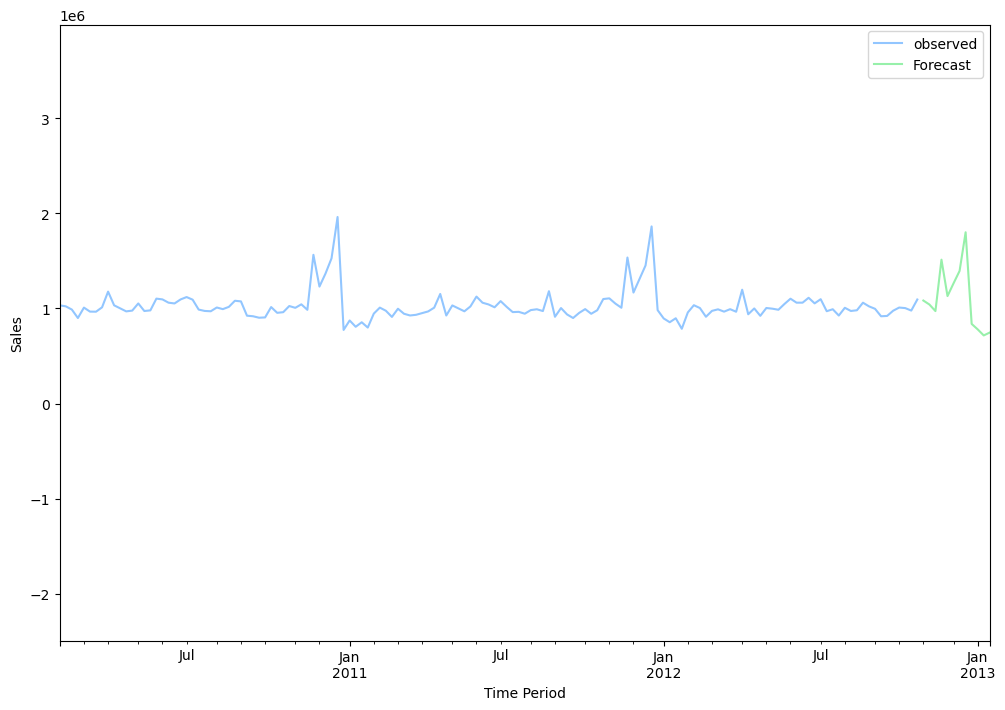

In [43]:
ax = sales.Weekly_Sales.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()